<a href="https://colab.research.google.com/github/Kiruba-Sherlin/Stock-Price-Predictor/blob/main/stockprice_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1-4002685589.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed


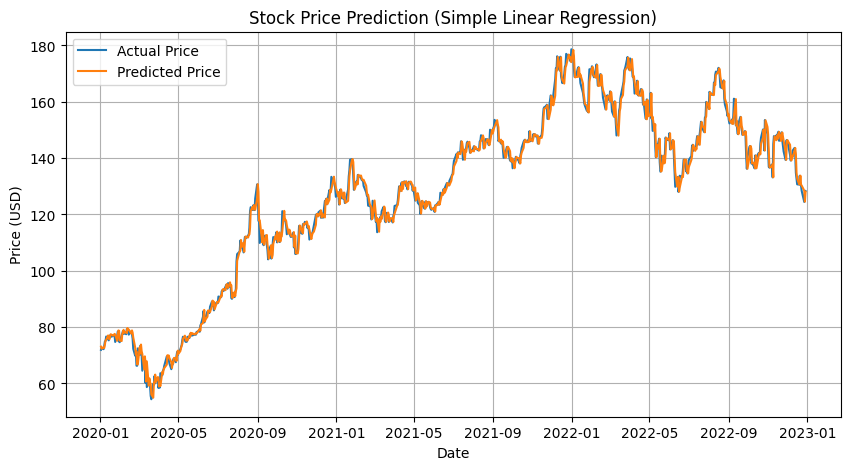

In [1]:
# Import required libraries
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 1: Download stock data
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
data = data[['Close']]  # Use only the closing price

# Step 2: Create a new column with shifted prices for prediction
data['Target'] = data['Close'].shift(-1)  # Predict next day's price

# Remove the last row with NaN target
data = data.dropna()

# Step 3: Prepare input (X) and output (y)
X = data[['Close']]  # Today's price
y = data['Target']   # Tomorrow's price

# Step 4: Train the model
model = LinearRegression()
model.fit(X, y)

# Step 5: Make a prediction
predicted = model.predict(X)

# Step 6: Show actual vs predicted in a simple plot
plt.figure(figsize=(10,5))
plt.plot(data.index, y, label='Actual Price')
plt.plot(data.index, predicted, label='Predicted Price')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Stock Price Prediction (Simple Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()